# Introduction to ensemble methods

In this section we learn more about different ways of combined classifier. We cover such methods like:
- boosting,
- bagging,
- stacking.

Other methods like xgboost are given only as examples of how to use it.

## Bagging

Bagging consists of the following steps:
1. create a bootstrap samples $S_{i}$,
2. for each sample train a classifier,
3. vote $f(x)=\arg\max\sum_{i}^{T}(f_{i}(X)=y)$. 
In other words, we have a list of prediction and set the prediction to the most occurance prediction.

Let's load the data set in the first place.

We use the accuracy metric from scikit-learn and the the tree package.

In [119]:
from sklearn import tree
import numpy as np
from sklearn.metrics import accuracy_score

decision_tree = tree.DecisionTreeClassifier(max_depth=2)

A boostrap generation method take randomly data from out data set and return is as a bootstrap set.

In [120]:
def create_bootstrap_data(bootstrap_data_set, bootstrap_labels):
    bootstrap_ids = np.random.randint(0, len(bootstrap_data_set), size=len(bootstrap_data_set))
    return bootstrap_data_set[bootstrap_ids,:],bootstrap_labels[bootstrap_ids]

We build a classifier based on decision tree that is used later for generation the prediction. We can use different classifiers here.

In [121]:
def build_classifier(data_set, labels):
    decision_tree = tree.DecisionTreeClassifier(max_depth=2)
    decision_tree.fit(data_set, labels)
    return decision_tree

Based on the number of cases, we build many classifiers where each trains on different bootstrap data set.

In [122]:
def build_classifiers(cases, bootstrap_data_set, bootstrap_labels):
    classifiers = []
    for case in range(cases):
        bset, blabels = create_bootstrap_data(bootstrap_data_set, bootstrap_labels)
        classifier = build_classifier(bset, blabels)
        classifiers.append(classifier)
    return classifiers

The voting part is just counting on the classified values and get the max occurency of it.

In [123]:
def vote(classifiers, test_data):
    output = []
    for classifier in classifiers:
        output.append(classifier.predict(test_data))
    output = np.array(output)
    print(output)
    predicted = []
    for i in range(len(test_data)):
        classified = output[:, i]
        counts = np.bincount(classified)
        predicted.append(np.argmax(counts))
    return predicted

Finally, we can check the results based on ten classifiers.

In [144]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

random_objects = np.random.randint(0, 130, size=120)
data_set = iris.data[random_objects]
labels = iris.target[random_objects]

train_set, test_set, train_labels, test_labels = train_test_split(data_set, labels, test_size=0.5, random_state=42)

classifiers = build_classifiers(8, train_set, train_labels)
predicted = vote(classifiers, test_set)
accuracy = accuracy_score(test_labels, predicted)
print(accuracy)

[[2 2 0 1 2 2 0 0 1 1 1 0 1 2 0 1 1 0 0 0 0 0 0 0 1 2 0 1 0 1 1 0 2 2 2 2
  1 2 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 2 0 2 2 0 1 1]
 [2 2 0 1 2 2 0 0 1 1 1 0 1 2 0 1 1 0 0 0 0 0 0 0 1 2 0 1 0 1 1 0 2 2 2 2
  1 2 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 2 0 2 2 0 1 1]
 [2 2 0 1 2 2 0 0 1 1 1 0 1 2 0 1 1 0 0 0 0 0 0 0 1 2 0 1 0 2 1 0 2 2 2 2
  1 2 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 2 2 0 1 1]
 [2 2 0 1 2 2 0 0 1 1 1 0 1 2 0 1 1 0 0 0 0 0 0 0 1 2 0 1 0 1 1 0 2 2 2 2
  1 2 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 2 0 2 2 0 1 1]
 [2 2 0 1 2 2 0 0 1 1 1 0 1 2 0 1 1 0 0 0 0 0 0 0 1 2 0 1 0 1 1 0 2 2 2 2
  1 2 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 2 0 2 2 0 1 1]
 [2 2 0 1 2 2 0 0 1 1 1 0 1 2 0 1 1 0 0 0 0 0 0 0 1 2 0 1 0 2 1 0 2 2 2 2
  1 2 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 2 2 0 1 1]
 [2 2 0 1 2 2 0 0 1 1 1 0 1 2 0 1 1 0 0 0 0 0 0 0 1 2 0 1 0 2 1 0 2 2 2 2
  1 2 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 2 2 0 1 1]
 [2 2 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 2 0 1 0 1 1 0 2 2 2 2
  1 2 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 2 2 0 1 1]]

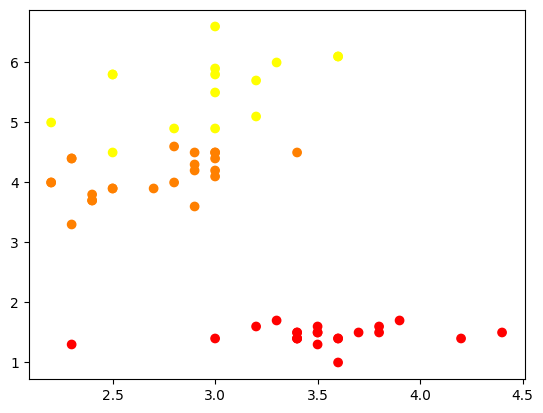

In [205]:
import matplotlib.pyplot as plt
import tikzplotlib

sizes = np.ones(len(test_set))*5

plt.scatter(test_set[:, 1], test_set[:, 2], c=test_labels, cmap='autumn')
plt.show()

tikzplotlib.save('filename.tex')

import matplotlib as mpl

plt.close()
mpl.rcParams.update(mpl.rcParamsDefault)

In [173]:
len(test_set)

60

In [202]:
a= zip(test_set[np.where(test_labels == 2),1][0],test_set[np.where(test_labels == 2),2][0])

In [203]:
b = tuple(a)

In [204]:
b

((2.5, 5.8),
 (3.6, 6.1),
 (2.8, 4.9),
 (3.2, 5.1),
 (3.0, 4.9),
 (3.0, 5.8),
 (2.5, 4.5),
 (3.0, 5.9),
 (3.0, 6.6),
 (3.2, 5.7),
 (2.5, 5.8),
 (3.3, 6.0),
 (2.2, 5.0),
 (3.0, 5.5),
 (3.6, 6.1))

We can easily compare it to just one tree:

In [145]:
tree_data_set, tree_labels = create_bootstrap_data(train_set, train_labels)
decision_tree = tree.DecisionTreeClassifier(max_depth=2)
decision_tree.fit(tree_data_set, tree_labels)
predicted1 = decision_tree.predict(test_set)
accuracy1 = accuracy_score(test_labels, predicted1)
print(accuracy1)

0.9166666666666666


In [152]:
for pred in range(len(predicted1)):
    if predicted1[pred] != test_labels[pred]:
        print(pred)

4
5
13
29
53


In [164]:
test_set[[4,5,13,29,53]][:,1]

array([2.8, 3.2, 3. , 2.5, 2.2])

In [165]:
test_set[[4,5,13,29,53]][:,2]

array([4.9, 5.1, 4.9, 4.5, 5. ])

In [153]:
for pred in range(len(predicted1)):
    if predicted[pred] != test_labels[pred]:
        print(pred)

29
53


In [194]:
test_set[[4,5,13,29,53]]

array([[5.6, 2.8, 4.9, 2. ],
       [6.5, 3.2, 5.1, 2. ],
       [6.1, 3. , 4.9, 1.8],
       [4.9, 2.5, 4.5, 1.7],
       [6. , 2.2, 5. , 1.5]])

## AdaBoost

AdaBoost consists of following steps:
* initialize weights to $\frac{1}{N}$, where $N$ is the number of datapoints,
* loop until 
  $\varepsilon_{t}<\frac{1}{2}$
  or maximum number of iteration is reached,

* train classifier on ${S,w^{(t)}}$ and get a hypothesis $h_{t}(x_{n})$ for datapoints $x_{n}$,

* compute error $\varepsilon_{t}=\sum_{n=1}^{N}w_{n}^{(t)}I(y_{n}\neq h_{t}(x_{n}))$,       

* set $\alpha_{t}=\log(\frac{1-\varepsilon_{t}}{\varepsilon_{t}})$.
  
* update weights $w_{n}^{(t+1)}=\frac{w_{n}^{(t)}\exp{\alpha_{t}I(y_{n}\neq h_{t}(x_{n}))}}{Z_{t}}$,
  where $Z_{t}$ is a normalization constant,

* output $f(X)=\text{sign}(\sum_{t=1}^{T}\alpha_{t}h_{t}(x))$.

Variables that are used by the classifier:

In [268]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

wine = load_wine()
random_objects = np.random.randint(0, 178, size=140)
data_set = wine.data[random_objects]
labels = wine.target[random_objects]

train_set, test_set, train_labels, test_labels = train_test_split(data_set, labels, test_size=0.5, random_state=42)

Weights initialization:

In [270]:
number_of_iterations = 10
weights = np.ones((len(train_set),)) / len(train_set)

The data set looks as:

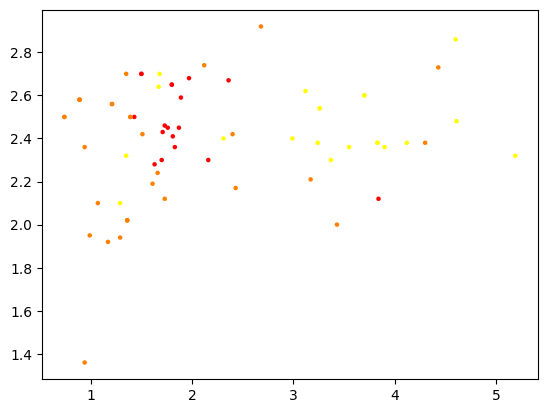

In [271]:
import matplotlib.pyplot as plt

sizes = np.ones(len(test_set))*5

plt.scatter(test_set[:, 1], test_set[:, 2], c=test_labels, s=sizes, cmap='autumn')
plt.show()

In [274]:
def train_model(classifier, weights):
    return classifier.fit(X=test_set, y=test_labels, sample_weight=weights)

Accuracy vector calculation for the weights: 0 - don't change the weight, 1 - change it.

In [275]:
def calculate_accuracy_vector(predicted, labels):
    result = []
    for i in range(len(predicted)):
        if predicted[i] == labels[i]:
            result.append(0)
        else:
            result.append(1)
    return result

Calculate the error rate $\varepsilon_{t}=\sum_{n=1}^{N}w_{n}^{(t)}I(y_{n}\neq h_{t}(x_{n}))$:

In [276]:
def calculate_error(weights, model):
    predicted = model.predict(test_set)
    return np.dot(weights,calculate_accuracy_vector(predicted, test_labels))

Calculate the $\alpha_{t}=\log(\frac{1-\varepsilon_{t}}{\varepsilon_{t}})$:

In [277]:
def set_alpha(error_rate):
    return np.log((1-error_rate)/error_rate)

Calculate the new weights $w_{n}^{(t+1)}=\frac{w_{n}^{(t)}\exp{\alpha_{t}I(y_{n}\neq h_{t}(x_{n}))}}{Z_{t}}$:

In [278]:
def set_new_weights(old_weights, alpha, model):
    new_weights = old_weights * np.exp(np.multiply(alpha,calculate_accuracy_vector(model.predict(test_set), test_labels)))
    Zt = np.sum(new_weights)
    return new_weights / Zt

Now, it's time to run the code and check the weights:

In [279]:
classifier = DecisionTreeClassifier(max_depth=1, random_state=1)
classifier.fit(X=train_set, y=train_labels)
alphas = []
classifiers = []
for iteration in range(number_of_iterations):
    model = train_model(classifier, weights)
    error_rate = calculate_error(weights, model)
    alpha = set_alpha(error_rate)
    weights = set_new_weights(weights, alpha, model)
    alphas.append(alpha)
    classifiers.append(model)

[0.02380952 0.01020408 0.02380952 0.01020408 0.01020408 0.01020408
 0.02380952 0.01020408 0.01020408 0.02380952 0.01020408 0.01020408
 0.01020408 0.01020408 0.01020408 0.01020408 0.01020408 0.01020408
 0.02380952 0.01020408 0.01020408 0.01020408 0.01020408 0.01020408
 0.02380952 0.01020408 0.01020408 0.02380952 0.02380952 0.02380952
 0.01020408 0.02380952 0.01020408 0.01020408 0.01020408 0.02380952
 0.01020408 0.01020408 0.02380952 0.01020408 0.01020408 0.01020408
 0.01020408 0.01020408 0.01020408 0.02380952 0.02380952 0.01020408
 0.01020408 0.01020408 0.01020408 0.01020408 0.01020408 0.02380952
 0.01020408 0.01020408 0.02380952 0.02380952 0.02380952 0.01020408
 0.01020408 0.02380952 0.02380952 0.02380952 0.01020408 0.01020408
 0.01020408 0.01020408 0.01020408 0.01020408]
[0.01555556 0.00666667 0.01555556 0.02173913 0.02173913 0.00666667
 0.01555556 0.00666667 0.00666667 0.01555556 0.00666667 0.02173913
 0.00666667 0.02173913 0.00666667 0.00666667 0.02173913 0.02173913
 0.01555556 0.00

In [265]:
weights = (weights/np.min(weights))*2

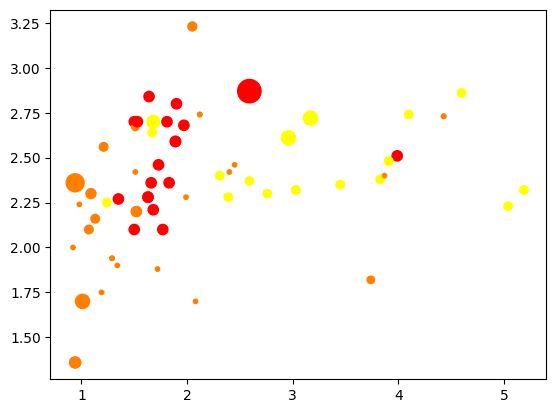

In [266]:
plt.scatter(test_set[:, 1], test_set[:, 2], c=test_labels, s=weights*5, cmap='autumn')


plt.show()

In [308]:
size = 1
unique_weights = np.unique(weights1)
for wei in range(len(unique_weights)):
    results = test_set[np.where(np.array(weights1) == unique_weights[wei])[0]]
    labs = test_labels[np.where(np.array(weights1) == unique_weights[wei])]
    for i in [0,1,2]:
        print("addplot[label"+str(i)+", only marks, mark=square*, mark size="+str(size)+"pt] coordinates {")
        selected = np.where(test_labels[np.where(np.array(weights1) == unique_weights[wei])]==i)
        if len(selected) > 0:
            for res in results[selected]:
                print("("+str(res[0])+","+str(res[1])+") ", end='')
        print("};")
    size = size + 0.5

addplot[label0, only marks, mark=square*, mark size=1pt] coordinates {
(13.72,1.43) (13.29,1.97) (13.51,1.8) (13.16,2.36) (13.73,1.5) (14.39,1.87) (13.68,1.83) (13.41,3.84) };
addplot[label1, only marks, mark=square*, mark size=1pt] coordinates {
(11.61,1.35) (11.81,2.12) (11.84,0.89) (12.64,1.36) (11.84,0.89) (11.76,2.68) (12.0,1.51) (13.34,0.94) (12.37,1.07) (11.45,2.4) (12.37,0.94) };
addplot[label2, only marks, mark=square*, mark size=1pt] coordinates {
(13.84,4.12) (13.69,3.26) (12.36,3.83) (12.58,1.29) (12.86,1.35) };
addplot[label0, only marks, mark=square*, mark size=1.5pt] coordinates {
(13.73,1.5) (14.22,1.7) (13.48,1.81) };
addplot[label1, only marks, mark=square*, mark size=1.5pt] coordinates {
(12.08,1.39) (12.37,1.17) (12.37,1.21) (12.22,1.29) (12.42,4.43) (11.41,0.74) (12.08,1.39) (12.29,3.17) (12.25,1.73) (11.41,0.74) };
addplot[label2, only marks, mark=square*, mark size=1.5pt] coordinates {
(12.7,3.55) (12.36,3.83) (12.82,3.37) (14.34,1.68) (13.4,4.6) };
addplot[label

## Stacking


Stacking method use several classifiers and use them to generate an input feature matrix for a stacked classifier that do the final prediction. To simplify the notebook, we use methods that are available in scikit-learn package. We load only several, but in the exercise you gonna need to load other methods as well.


We have the following steps:    

* create $T$ classifiers and learn each to get $m$ predictions (hypothesis $h_{t}$,
* construct data set of predictions and construct a new classifier $C_{m}$ for each dataset,
* construct a $C_{h}$ classifier that combines all $C_{m}$ classifiers.

First of all, let's import required libraries:

In [330]:
import numpy as np

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In the first part we build three different models based on three different classifiers:

In [402]:
def build_classifiers(train_set, train_labels):
    
    neighbors = KNeighborsClassifier()
    neighbors.fit(train_set, train_labels)

    bayes = GaussianNB()
    bayes.fit(train_set, train_labels)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(train_set, train_labels)

    return neighbors, bayes, qda

Based on the classifiers prediction, we build a feature vector for the decision tree classifier. Finally, we train and predict with the stacked classifier.

In [405]:
def build_stacked_classifier(classifiers, train_set, train_labels, test_set, test_labels):
    output = []
    for classifier in classifiers:
        output.append(classifier.predict(train_set))
    meta_set = np.stack((output[0],output[1],output[2]), axis = 1)

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(meta_set, train_labels)
    
    output = []
    for classifier in classifiers:
        output.append(classifier.predict(test_set))
    meta_test_set = np.stack((output[0],output[1],output[2]), axis = 1)
    predicted = decision_tree.predict(meta_test_set)
    return predicted

Stacked classifier accuracy can be measured as below:

In [406]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

random_objects = np.random.randint(0, 178, size=140)
data_set = breast.data[random_objects]
labels = breast.target[random_objects]

train_set, test_set, train_labels, test_labels = train_test_split(data_set, labels, test_size=0.3, random_state=42)

classifiers = build_classifiers(train_set, train_labels)
predicted = build_stacked_classifier(classifiers, train_set, train_labels, test_set, test_labels)
accuracy = accuracy_score(test_labels, predicted)
print(accuracy)

0.9761904761904762


In this case, the three used classifiers does not give any value, because we get a higher value using just the decision treee classifier.

In [407]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_set, train_labels)
predicted = decision_tree.predict(test_set)
accuracy = accuracy_score(test_labels, predicted)
print(accuracy)

0.9047619047619048


## Grading

Grading is a stacking type where we train a grading classifier that checks if our classifier is good or not on the prediction. We need to build classifiers like we did in the previous example:

In [411]:
def build_grad_classifiers(train_set, train_labels):

    neighbors = KNeighborsClassifier()
    neighbors.fit(train_set, train_labels)

    bayes = GaussianNB()
    bayes.fit(train_set, train_labels)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(train_set, train_labels)

    return neighbors, bayes, qda

In the method below we get a vector of model grads:

In [412]:
def calculate_accuracy_vector(predicted, labels):
    result = []
    for i in range(len(predicted)):
        if predicted[i] == labels[i]:
            result.append(1)
        else:
            result.append(0)
    return result

Finally, we can build our grading meta classifier:

In [426]:
def build_grading_classifier(classifiers, train_set, train_labels):
    output = []
    matrix = []
    for classifier in classifiers:
        predicted = classifier.predict(train_set)
        output.append(predicted)
        matrix.append(calculate_accuracy_vector(predicted, train_labels))

    grading_classifiers = []
    for i in range(len(classifiers)):
        tree = DecisionTreeClassifier()
        tree.fit(train_set, matrix[i])
        grading_classifiers.append(tree)
    return grading_classifiers

Test prediction function takes the model and grading model and return the prediction and grad of the prediction:

In [427]:
def test_prediction(classifiers, grading_classifiers, test_set, i):
    prediction = classifiers[i].predict(test_set)
    grad = grading_classifiers[i].predict(test_set)
    return prediction, grad

We can test now the output, labels and grads of the output:

In [446]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

random_objects = np.random.randint(0, 178, size=140)
data_set = breast.data[random_objects]
labels = breast.target[random_objects]

train_set, test_set, train_labels, test_labels = train_test_split(data_set, 
                                                                  labels, 
                                                                  test_size=0.5, 
                                                                  random_state=42)

classifiers = build_grad_classifiers(train_set, train_labels)
grading_classifiers = build_grading_classifier(classifiers, train_set, train_labels)
prediction, grad = test_prediction(classifiers, grading_classifiers, test_set, 1)

print(prediction)
print(grad)
print(test_labels)

[1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1]


/Users/kprzystalski/miniforge3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [447]:
accuracy_score(prediction, test_labels)

0.8571428571428571

In [ ]:
for p in range(len(prediction)):
    print(str(prediction[p]) + " & " + " 